In [2]:
# 导入模块
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 导入MNIST数据集，将训练集和测试集存储在相应变量中
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 特征值标准化
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"训练数据形状: {x_train.shape}") 
print(f"训练标签形状: {y_train.shape}")
print(f"测试数据形状: {x_test.shape}") 
print(f"测试标签形状: {y_test.shape}")

训练数据形状: (60000, 28, 28)
训练标签形状: (60000,)
测试数据形状: (10000, 28, 28)
测试标签形状: (10000,)


In [2]:
# 构建顺序cnn
model = tf.keras.models.Sequential()  # 空的

# Flatten()函数将数据平展为一维数组
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# 添加隐藏层和输出层
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()  # 各层参数信息

C:\Users\siyu_\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 编译、训练和评估顺序网络模型
# 编译网络模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 训练网络模型
model.fit(x_train, y_train, batch_size=32, epochs=5)

# 评估网络模型
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2651 - sparse_categorical_accuracy: 0.9245
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1167 - sparse_categorical_accuracy: 0.9658
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9756
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9816
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0454 - sparse_categorical_accuracy: 0.9861
313/313 - 1s - 2ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9755


[0.07633151859045029, 0.9754999876022339]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


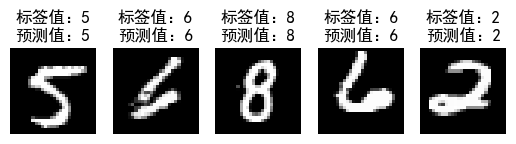

In [8]:
# 预测和可视化
for i in range(5):
    t = np.random.randint(1, 10000)  # 生成随机整数t用于抽取图像
    x = tf.reshape(x_test[t], (1, 28, 28))  # 将数据重塑为模型输入格式
    
    # 应用网络模型进行预测
    y_pred = np.argmax(model.predict(x), axis=1)
    
    # 创建子图显示结果
    plt.subplot(1, 5, i + 1)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.axis("off")  # 设置不显示坐标轴
    plt.imshow(x_test[t], cmap='gray')  # 显示灰度图像
    
    # 设置子图标题显示标签值和预测值
    title = "标签值：" + str(y_test[t]) + "\n预测值：" + str(y_pred[0])
    plt.title(title)

plt.show()  # 显示图形